# Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the Data

In [2]:
df = pd.read_csv('brca.csv')

In [3]:
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

# Check if we have missing values

In [5]:
df.isna().sum()

Unnamed: 0             0
x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

# Clean and Prepare the Data

In [6]:
df.shape

(569, 32)

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
print(df.columns)

Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean',
       'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se',
       'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')


In [9]:
df.rename(columns={'y': 'cancer_type'}, inplace= True)

In [10]:
df.cancer_type.unique()

array(['B', 'M'], dtype=object)

In [11]:
df['cancer_type'], _ = pd.factorize(df['cancer_type'])

In [12]:
df["cancer_type"].value_counts()

0    357
1    212
Name: cancer_type, dtype: int64

# Explore the Data 

In [13]:
df.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,cancer_type
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


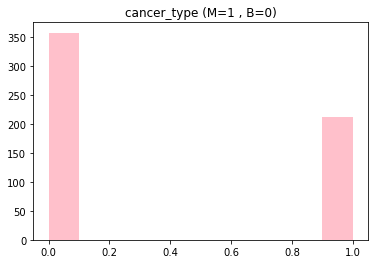

In [14]:
hist_color='pink'
df.describe()
plt.hist(df['cancer_type'], color=hist_color)
plt.title('cancer_type (M=1 , B=0)')
plt.show()

In [15]:
df.iloc[:,1:].corr()

,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,cancer_type
x.texture_mean,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
x.perimeter_mean,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
x.area_mean,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
x.smoothness_mean,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
x.compactness_mean,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
x.concavity_mean,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
x.concave_pts_mean,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
x.symmetry_mean,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
x.fractal_dim_mean,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838
x.radius_se,0.275869,0.691765,0.732562,0.301467,0.497473,0.631925,0.698050,0.303379,0.000111,1.000000,...,0.194799,0.719684,0.751548,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559,0.567134


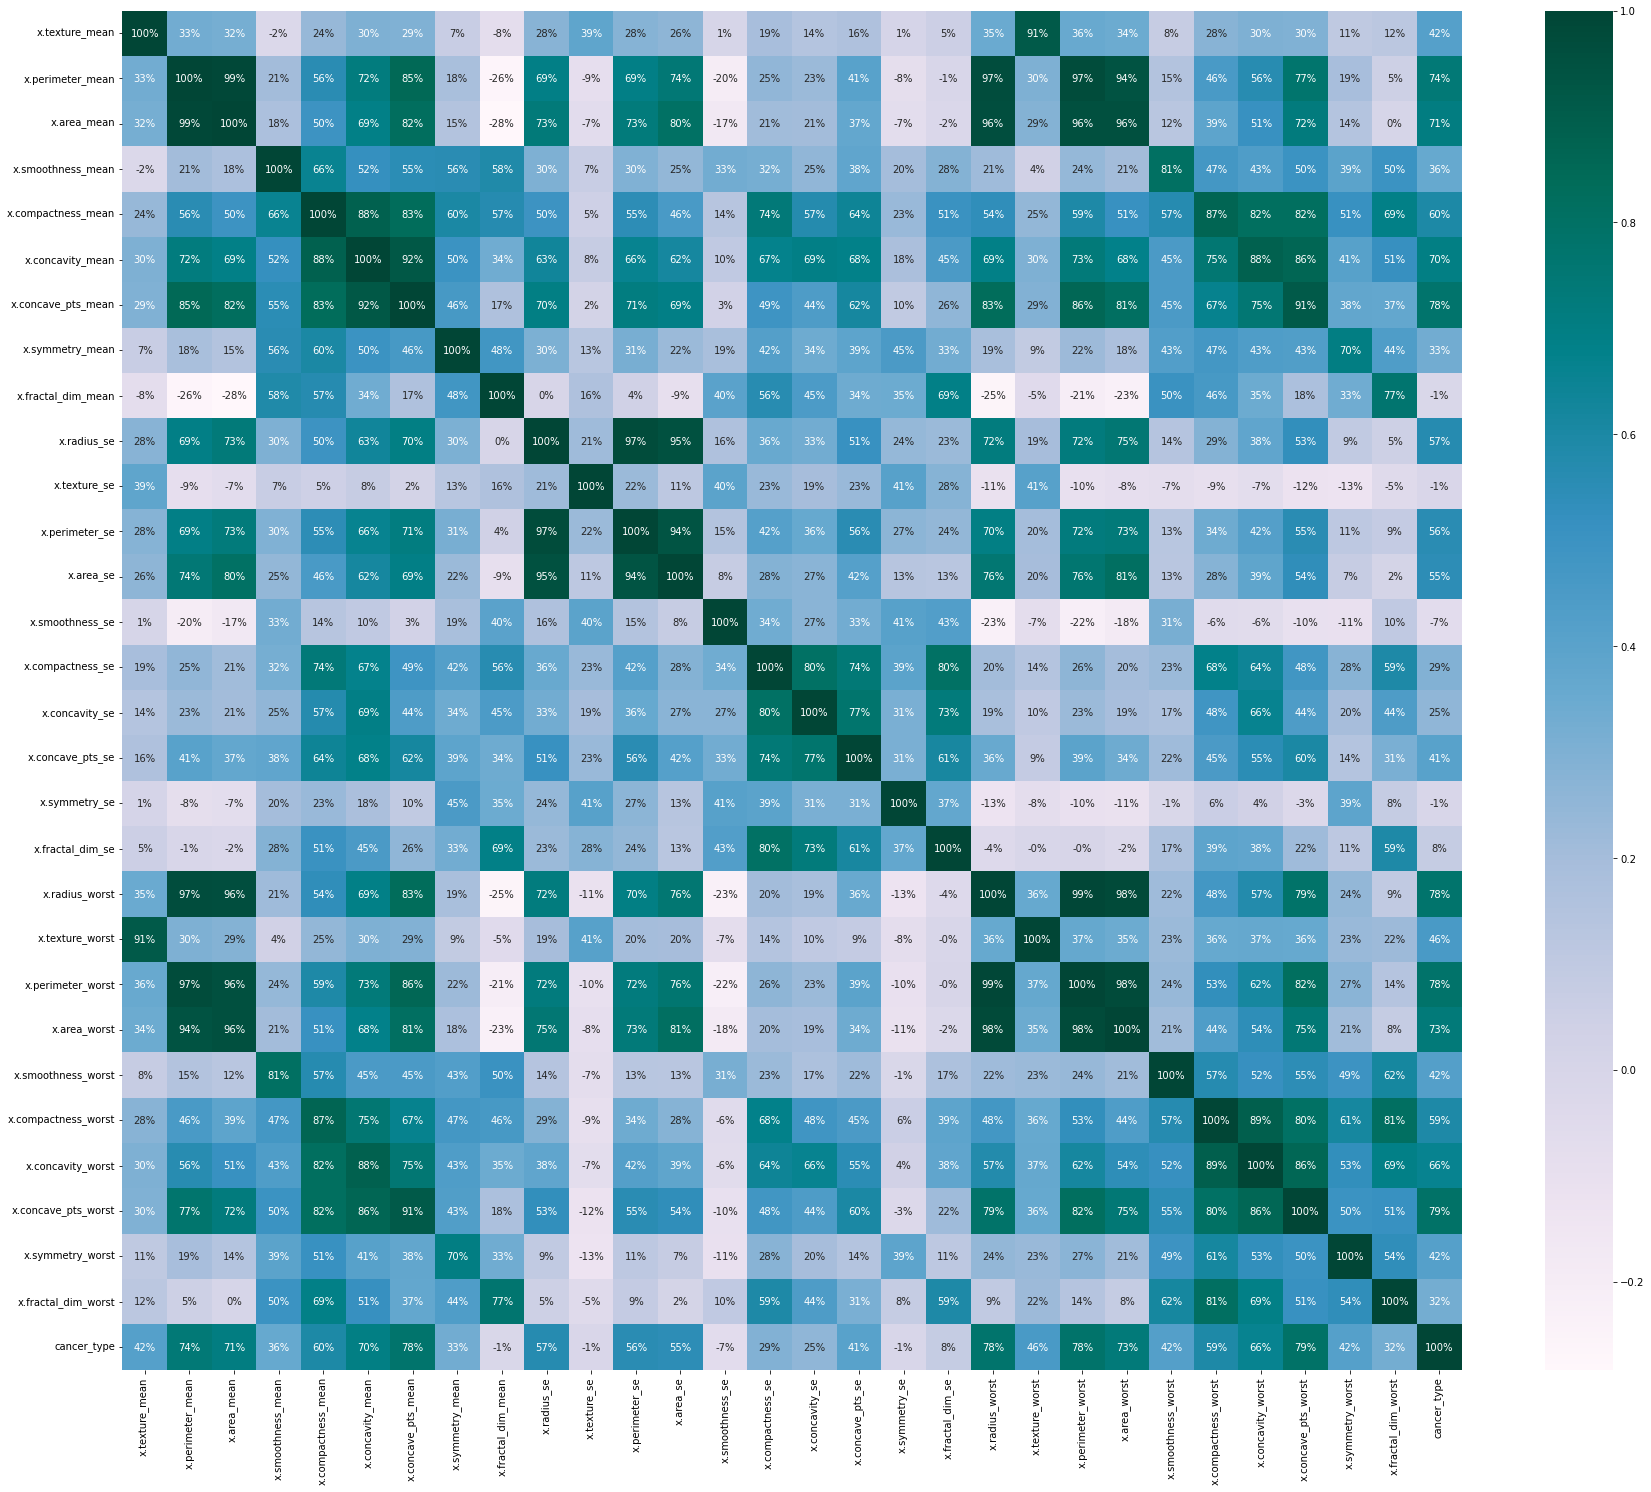

In [16]:
plt.subplots(figsize=(30,25))
sns.heatmap(df.iloc[:,1:].corr(),annot=True,fmt=".0%", cmap='PuBuGn');

# Splitting Data to Features and Labels

In [17]:
X=df.drop(["cancer_type"],axis=1)
Y=df["cancer_type"]

# Creating Test and Training dataset

In [18]:
traindf, testdf = train_test_split(df, test_size = 0.3)

# Model Classification

In [19]:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data):
        train_predictors = (data[predictors].iloc[train, :])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test])) 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    model.fit(data[predictors], data[outcome])

# Logistic Regression Model

In [20]:
predictor_var = ['x.radius_mean','x.perimeter_mean','x.area_mean','x.compactness_mean','x.concave_pts_mean']
outcome_var='cancer_type'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 90.704%
Cross-Validation Score : 91.250%
Cross-Validation Score : 89.375%
Cross-Validation Score : 89.167%
Cross-Validation Score : 89.027%
Cross-Validation Score : 89.703%


In [21]:
predictor_var = ['x.radius_mean']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 86.935%
Cross-Validation Score : 87.500%
Cross-Validation Score : 87.500%
Cross-Validation Score : 86.667%
Cross-Validation Score : 86.203%
Cross-Validation Score : 86.937%


# Decision Tree Model

In [22]:
predictor_var = ['x.radius_mean','x.perimeter_mean','x.area_mean','x.compactness_mean','x.concave_pts_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 90.000%
Cross-Validation Score : 86.875%
Cross-Validation Score : 89.583%
Cross-Validation Score : 88.074%
Cross-Validation Score : 88.180%


In [23]:
predictor_var = ['x.radius_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 96.482%
Cross-Validation Score : 81.250%
Cross-Validation Score : 79.375%
Cross-Validation Score : 79.167%
Cross-Validation Score : 79.628%
Cross-Validation Score : 80.665%


# Random Forest Model

In [24]:
predictor_var = ['x.radius_mean','x.perimeter_mean','x.area_mean','x.compactness_mean','x.concave_pts_mean']
model = RandomForestClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 92.500%
Cross-Validation Score : 89.375%
Cross-Validation Score : 90.417%
Cross-Validation Score : 90.281%
Cross-Validation Score : 89.946%


In [25]:
predictor_var = ['x.radius_mean']
model = RandomForestClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 96.482%
Cross-Validation Score : 81.250%
Cross-Validation Score : 80.000%
Cross-Validation Score : 80.000%
Cross-Validation Score : 80.253%
Cross-Validation Score : 81.165%


In [26]:
features_mean=list(df.columns[1:11])

In [27]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

x.radius_mean    1.0
dtype: float64


# Evaluate the model on Test Dataset

In [28]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdf,predictor_var,outcome_var)

Accuracy : 95.322%
Cross-Validation Score : 80.000%
Cross-Validation Score : 84.118%
Cross-Validation Score : 86.471%
Cross-Validation Score : 89.118%
Cross-Validation Score : 88.941%
